In [1]:
from agent import Agent
from utils import compute_score_bounds, compute_continuity_noise
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eta = np.array([3., 0.]).reshape(2, 1)
gamma = np.array([0.1, 1.]).reshape(2, 1)
min_eigenvalue = min(gamma)
agent = Agent(eta, gamma)
beta = np.array([1., 0.]).reshape(2, 1)
continuity_sigma = np.sqrt(1 / (2 * min_eigenvalue * (np.sqrt(2 * np.pi * np.e)))) + 0.10

In [3]:
discontinuity_sigma = continuity_sigma - 0.5
discontinuity_sigma

array([0.69993346])

In [4]:
discontinuity_sigma_w_fp = continuity_sigma - 0.20
discontinuity_sigma_w_fp

array([0.99993346])

In [5]:
continuity_sigma

array([1.19993346])

In [6]:
bounds = compute_score_bounds(beta, discontinuity_sigma)
thresholds = np.linspace(bounds[0], bounds[1], 2500)

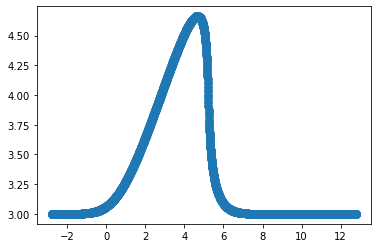

In [7]:
scores_brs_cont = [np.matmul(beta.T, agent.best_response(beta, s, continuity_sigma)).item() for s in thresholds]
plt.scatter(thresholds, scores_brs_cont, s=60.)

In [8]:
scores_brs_discont = np.array([np.matmul(beta.T, agent.best_response(beta, s, discontinuity_sigma)).item() for s in thresholds])
good_idx = np.where(scores_brs_discont != 0)

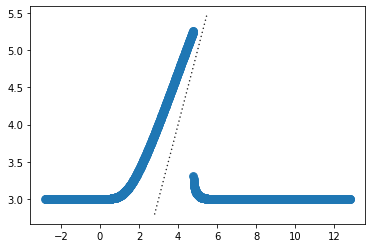

In [9]:
plt.scatter(thresholds[good_idx], scores_brs_discont[good_idx], s=60.)
line = np.linspace(min(scores_brs_discont[good_idx]) - 0.2, max(scores_brs_discont[good_idx]) + 0.2, 50)
plt.scatter(line, line, linestyle="dashed", c="k", s=0.2)

In [10]:
scores_brs_discont_w_fp = np.array([np.matmul(beta.T, agent.best_response(beta, s, discontinuity_sigma_w_fp)).item() for s in thresholds])
good_idx = np.where(scores_brs_discont_w_fp != 0)

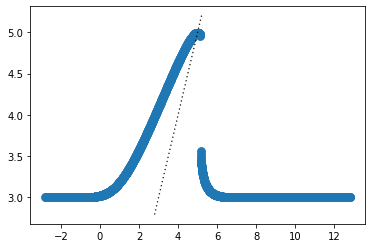

In [11]:
plt.scatter(thresholds[good_idx], scores_brs_discont_w_fp[good_idx], s=60.)
line = np.linspace(min(scores_brs_discont[good_idx]) - 0.2, max(scores_brs_discont_w_fp[good_idx]) + 0.2, 50)
plt.scatter(line, line, linestyle="dashed", c="k", s=0.2)

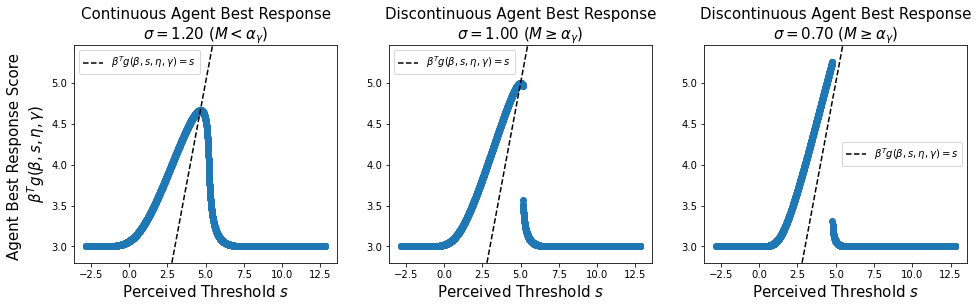

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharex=True)
#plt.xlabel("Perceived Threshold " + r"$s$")

ax[0].scatter(thresholds, scores_brs_cont)
#ax[2].set_xlabel("Perceived Threshold " + r"$s$")
#ax[2].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
ax[0].set_title("Continuous Agent Best Response\n" + r"$\sigma=1.20$"  + " " + r"$(M < \alpha_{\gamma})$", fontsize=15)
ax[0].plot(line, line, "--", c="k", label=r"$\beta^{T}g(\beta, s, \eta, \gamma) = s$")

ax[0].legend()

ax[1].scatter(thresholds, scores_brs_discont_w_fp)
#ax[1].set_xlabel("Perceived Threshold " + r"$s$")
#ax[2].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
ax[1].set_title("Discontinuous Agent Best Response\n" + r"$\sigma=1.00$"  + " " + r"$(M \geq \alpha_{\gamma})$", fontsize=15)
ax[1].plot(line, line, "--", c="k", label=r"$\beta^{T}g(\beta, s, \eta, \gamma) = s$")

ax[1].legend()


ax[2].scatter(thresholds[good_idx], scores_brs_discont[good_idx])
#ax[0].set_xlabel("Perceived Threshold " + r"$s$")
ax[0].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
ax[2].set_title("Discontinuous Agent Best Response" + "\n" + r"$\sigma=0.70$"  + " " + r"$(M \geq \alpha_{\gamma})$", fontsize=15)
ax[2].plot(line, line, "--", c="k", label=r"$\beta^{T}g(\beta, s, \eta, \gamma) = s$")

ax[2].legend()


all_scores = scores_brs_cont + scores_brs_discont

max_score = max(max(scores_brs_discont), max(scores_brs_cont))+ 0.20
min_score = min(min(scores_brs_cont), min(scores_brs_cont)) - 0.20

ax[2].set_ylim(min_score , max_score )
ax[1].set_ylim(min_score , max_score )
ax[0].set_ylim(min_score , max_score )


line = np.linspace(min(scores_brs_discont[good_idx]) - 0.2, max(scores_brs_discont[good_idx]) + 0.2, 50)

# # Get extents of subplot
# x0 = min([a.get_position().x0 for a in ax])
# y0 = min([a.get_position().y0 for a in ax])
# x1 = max([a.get_position().x1 for a in ax])
# y1 = max([a.get_position().y1 for a in ax])

# # Hidden axes for common x and y labels
# plt.axes([x0, y0, x1 - x0, y1 - y0], frameon=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax[0].set_xlabel("Perceived Threshold " + r"$s$", fontsize=15)
ax[1].set_xlabel("Perceived Threshold " + r"$s$", fontsize=15)
ax[2].set_xlabel("Perceived Threshold " + r"$s$", fontsize=15)


plt.savefig("figs/paper_continuity.pdf")
